In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# Information about data columns 
# https://github.com/udacity/machine-learning/tree/master/projects/titanic_survival_exploration
# Import data from a .csv file and show some information about it
titanic_df = pd.read_csv('titanic_data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
# Show some infos about our dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [31]:
# How you can see Age, Cabin and Embarked has different number of rows, so we have to clean this.
# First lets analyze and see which column we can delete from the analysis.
# Name, Ticket, Fare, Cabin and Embarked in a first analysis is difficult to say that have any kind
# of correlation to determine if a person survived the accident.
titanic_df.drop(['Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0


In [33]:
# So, age is only column that don't have same number of rows
# Let's delete that rows, and analyze just the one that have gender.
titanic_df.dropna(inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
dtypes: float64(1), int64(5), object(1)
memory usage: 44.6+ KB


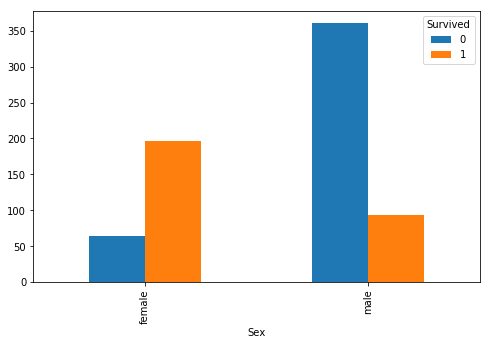

In [41]:
# Now let's plot number of women and men that survived or not
# Remember that 0 is not survived and 1 survived
titanic_df.groupby(['Sex', 'Survived'])['PassengerId'].count() \
.unstack().reset_index().plot.bar(x = 'Sex', y = [0, 1], figsize=(8,5))

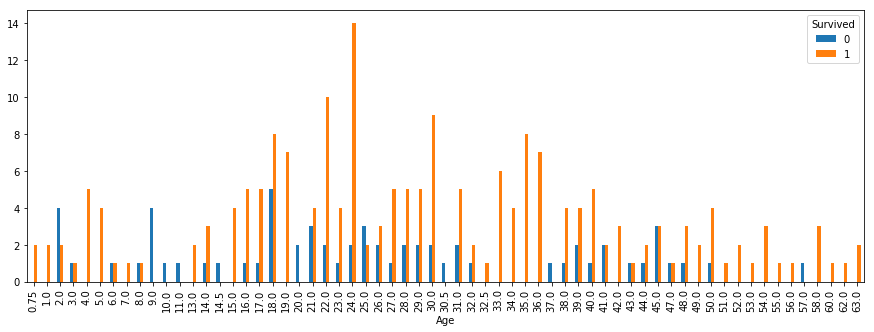

In [45]:
# Now that we know that famele survived more let's see it correlation with age and pclass
titanic_df[(titanic_df['Sex'] == 'female')].groupby(['Age', 'Survived'])['PassengerId'].count()\
.unstack().reset_index().plot.bar(x = 'Age', y = [0,1], figsize=(15,5))

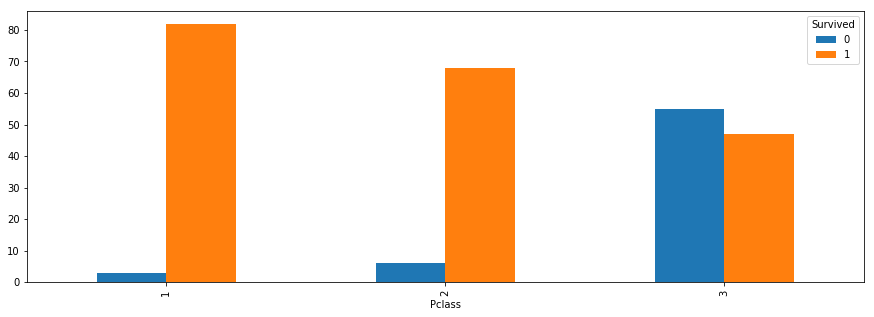

In [48]:
# Let's see correlation with pclass
titanic_df[(titanic_df['Sex'] == 'female')].groupby(['Pclass', 'Survived'])['PassengerId'].count()\
.unstack().reset_index().plot.bar(x = 'Pclass', y = [0,1], figsize=(15,5))

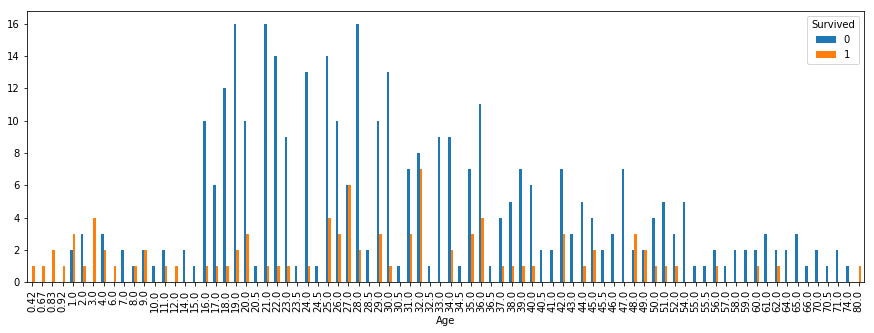

In [46]:
# Let's do the same thing now with male
titanic_df[(titanic_df['Sex'] == 'male')].groupby(['Age', 'Survived'])['PassengerId'].count()\
.unstack().reset_index().plot.bar(x = 'Age', y = [0,1], figsize=(15,5))

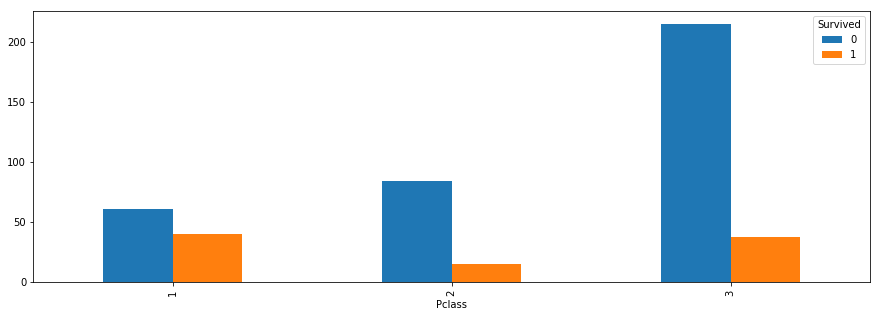

In [49]:
# Pclass now
titanic_df[(titanic_df['Sex'] == 'male')].groupby(['Pclass', 'Survived'])['PassengerId'].count()\
.unstack().reset_index().plot.bar(x = 'Pclass', y = [0,1], figsize=(15,5))

In [50]:
# Export treated dataset
titanic_df.to_csv('titanic_data_treated.csv', index=False)